### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba & Posta, 2025)

# Scheduled Flows

## Overview
The idea of this module is to create an emissions scenario -- a _schedule_ -- that describes how much carbon humans have released to the atmosphere in the past, and that makes projections about future emissions. 

## Mathematical form of anthropogenic emissions
The emissions scenario generated here has the form 

$$ 
\epsilon(t) = e^{kt}  \cdot \epsilon_0 e^{-kt_0} \cdot \frac{e^{3 (t_{p_1}-t)/t_{decarb}}}{1+e^{3(t_{p_1}-t)/t_{decarb}}} \ \ \ \ (1)
$$


where $\epsilon$ is understood to be a rate of emission of carbon into the atmosphere, on a per-year basis, as a function of time, $t$. You can see that there are three parts to this expression, which we can understand as follows:

### Exponential growth
The first term, $e^{kt}$, is all about *exponential growth*. We can expect $k \approx 0.02-0.03 \ yr^{-1}$ (i.e., $2\%-3\% \ yr^{-1}$), since that's about the growth rate of human population over the last few hundred years.

### Pegging
The second term in Eq. 1, $\epsilon_0 e^{-kt_0}$, is there to let us "peg" anthropogenic emissions to some known, historical value. For example, in the year $t_0=2003$, we think the rate anthropogenic emissions was about $\epsilon_0=9 \ GtC/year$.

### Specifying a year of peak emissions, and the decarbonization time
To complete the third term in Eq. 1, we'll have to assign a value for the *decarbonization time*, $t_{decarb}$. That's  the number of years starting from when we're 20% into decarbonization, until the year we're 80% done. We also have to decide on a year of peak emissions, which we'll call $t_{peak}$. Then the parameter $t_{p_1}$ appearing in Eq. 1 is given by

$$
t_{p_1} = t_{peak} + {t_{decarb} \over 3} log( {3 \over t_{decarb} k}-1) \ \ \ \ (2)
$$


## Metadata and functions
Part of good coding practice is finding ways to save data in a way that is "self-documenting." Like, including the units of your data, or other parameters. Fortunately, with a combination of Python's _Pandas_ package, and a built-in Python feature called _dictionaries_, we can do all that. So we'll be learning a bit about _Pandas_ and _dictionaries_ too.

Another part of good coding practice is to find ways to re-use code. Here, you'll be doing that using Python _functions_.

## Learning goals

1. I can explain the physical meaning behind all the terms in Eqs. 1 and 2.
1. I can generate an emissions scenario with desired properties (like a desired emission rate in a certain year).
1. I can use pandas and dictionaries to write and read data and associated metadata to a file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))
import meclib.cl as cl

### Calculating an emission scenario that peaks at a desired year
Our first task is to compute an emission scenario as described in Eqs. 1 and 2. An example is shown below.

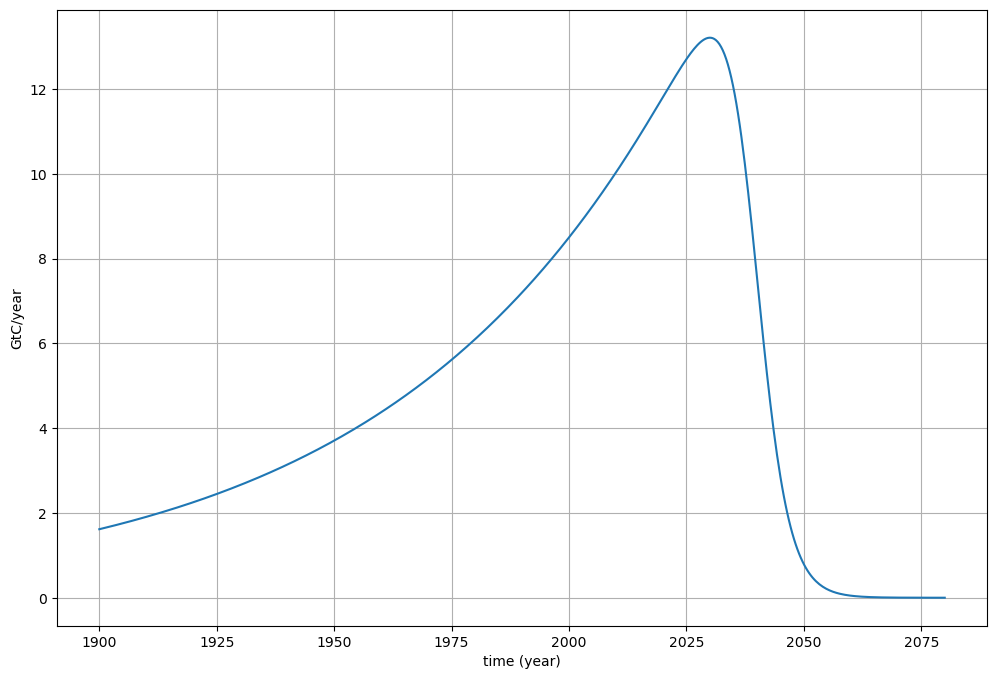

In [4]:
t_start = 1900
t_stop = 2080
nsteps = 500
t = np.linspace(t_start,t_stop,nsteps)
t_peak = 2030
t_decarb = 10
k = 0.0166
t_0 = 2000
eps_0 = 8.5

tp1 = t_peak + (t_decarb/3)*np.log(3/(k*t_decarb)-1)
myeps = np.exp(k*t) * eps_0*np.exp(-k*t_0) * np.exp(3/t_decarb*(tp1-t)) / (1+np.exp(3/t_decarb*(tp1-t)))

plt.figure()
plt.plot(t,myeps)
plt.xlabel('time (year)')
plt.ylabel('GtC/year')
plt.grid()

### Pause for analysis
You should verify that that the rate of emission really is 8.5 GtC/year in the "pegged" year (2000), that the emissions really did peak in the desired year (in this case, 2030), and that decarbonization after that year really did take about 10 years.

### Your turn
In the cell below, create an emissions scenario with the same parameters as before, except for:

- make the timeline run from the year 1750 to the year 2150, with 600 steps;
- peg the emissions at 9 GtC/year in the year 2003, peaking in the year 2040, with a decarbonization time  ($t_{decarb}$) of 15 years.

It will be convenient for what follows if you name your emissions scenario array "myeps."

Make a graph of your scenario, labeling axes appropriately.

tp1 = 2052.0113343222993


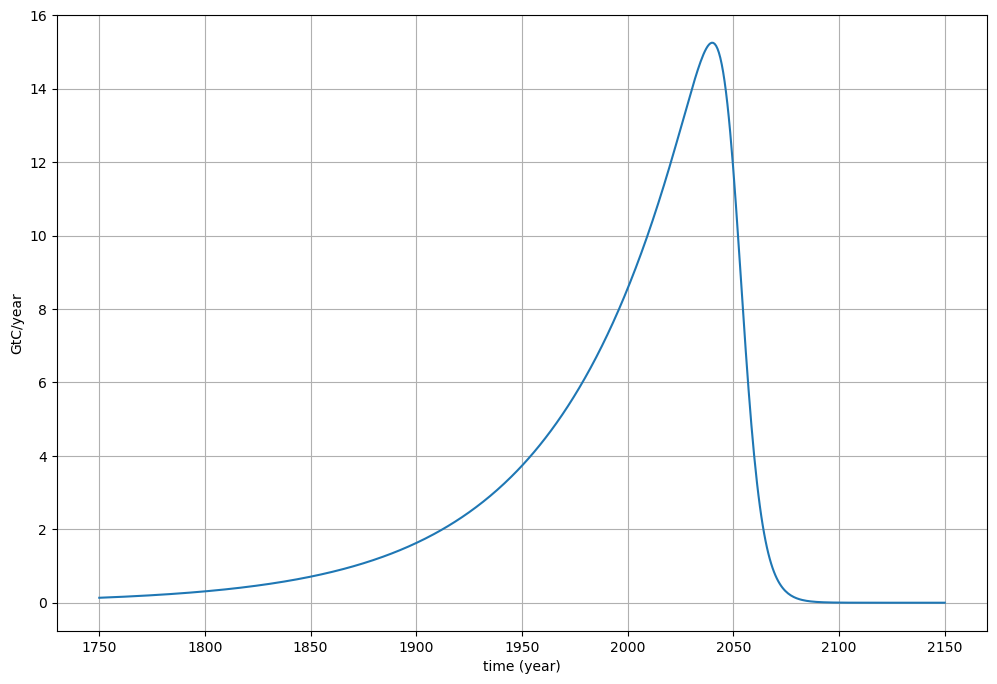

In [7]:
### BEGIN SOLUTION

t_start = 1750
t_stop = 2150
nsteps = 600
t = np.linspace(t_start,t_stop,nsteps)
t_peak = 2040
# t_peak = 2030
# t_peak = 2020
t_decarb = 15
t_0 = 2003
eps_0 = 9

tp1 = t_peak + (t_decarb/3)*np.log(3/(k*t_decarb)-1); print('tp1 =',tp1)
myeps = np.exp(k*t) * eps_0*np.exp(-k*t_0) * np.exp(3/t_decarb*(tp1-t)) / (1+np.exp(3/t_decarb*(tp1-t)))

plt.figure()
plt.plot(t,myeps)
plt.xlabel('time (year)')
plt.ylabel('GtC/year')
plt.grid()

### END SOLUTION

### Pause for analysis
Once again, you should verify that the emissions scenario has all the properties you expect it to have.

### Setting up your data with metadata for storage
The code below packages your results into a _Pandas_ dataframe. Why? Well, we want to save the data for use later, and _Pandas_ is a kind of industry standard. It's not quite enough, however, to store data: we really need to attach _metadata_ to these data. Metadata include things like the units, and also parameters like the growth rate, the transition year, etc., that went into generating the emissions schedule.

As you can see from the example below, we do this by creating a bigger structure -- a _dictionary_. A dictionary has the capability of holding lots of different pieces -- called _elements_ -- of various sizes and shapes. In the example below, the dictionary starts out empty, then we add an element (the _Pandas_ dataframe, of course). Later we'll be adding more elements to this dictionary, using the same procedure.

In [10]:
# Create an empty dictionary
epsdictionary = dict()

# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Add the dataframe to the dictionary
epsdictionary['dataframe']=epsdf

# Report the contents of the dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.349872e-01
 1    1750.667780  1.364919e-01
 2    1751.335559  1.380133e-01
 3    1752.003339  1.395517e-01
 4    1752.671119  1.411073e-01
 ..           ...           ...
 595  2147.328881  5.194863e-07
 596  2147.996661  4.596060e-07
 597  2148.664441  4.066280e-07
 598  2149.332220  3.597567e-07
 599  2150.000000  3.182882e-07
 
 [600 rows x 2 columns]}

### Adding elements to our dictionary
The first two lines of the cell below add two elements of metadata to our dictionary.

In [12]:
# This adds two elements to the dictionary
epsdictionary['emission units']='GtC/year'
epsdictionary['k']=k

# This displays the contents of the dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.349872e-01
 1    1750.667780  1.364919e-01
 2    1751.335559  1.380133e-01
 3    1752.003339  1.395517e-01
 4    1752.671119  1.411073e-01
 ..           ...           ...
 595  2147.328881  5.194863e-07
 596  2147.996661  4.596060e-07
 597  2148.664441  4.066280e-07
 598  2149.332220  3.597567e-07
 599  2150.000000  3.182882e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.0166}

### Your turn
Add the following elements of metadata to your dictionary:
1. the pegged year;
1. the emissions at that pegged year;
1. the year of peak emissions;
1. the decarbonization time.

Then use "display" to confirm they were added properly.

In [14]:
# Add the additional elements mentioned above to your dictionary
### BEGIN SOLUTION
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_peak'] = t_peak
epsdictionary['t_decarb'] = t_decarb
epsdictionary['k'] = k
display(epsdictionary)
### END SOLUTION

{'dataframe':             time     emissions
 0    1750.000000  1.349872e-01
 1    1750.667780  1.364919e-01
 2    1751.335559  1.380133e-01
 3    1752.003339  1.395517e-01
 4    1752.671119  1.411073e-01
 ..           ...           ...
 595  2147.328881  5.194863e-07
 596  2147.996661  4.596060e-07
 597  2148.664441  4.066280e-07
 598  2149.332220  3.597567e-07
 599  2150.000000  3.182882e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.0166,
 't_0': 2003,
 'eps_0': 9,
 't_peak': 2040,
 't_decarb': 15}

### Saving your emissions scenario
Use the cell below to save your emissions scenario (the entire dictionary -- data and metadata) as a file. Here's some sample code -- although you might want to modify the filename to something more meaningful, especially since we'll be eventually saving multiple scenarios.

    # Decide on a name for the file, and then save to that file
    filename = 'Peaks_in_2040.pkl'
    cl.SaveMyScenario(epsdictionary, filename)

In [16]:
# Assign a name for the file, and save it
### BEGIN SOLUTION

filename = '../zzz ScenarioLibrary/Peaks_in_2040.pkl'
# filename = '../zzz ScenarioLibrary/Peaks_in_2030.pkl'
# filename = '../zzz ScenarioLibrary/Peaks_in_2020.pkl'
cl.SaveMyScenario(epsdictionary, filename)

### END SOLUTION

### Double-checking
It's often nice to double-check that you really did save what you thought you did. The cell below will load (read) the file you just saved and print out some information about it.

What I thought I saved:


{'dataframe':             time     emissions
 0    1750.000000  1.349872e-01
 1    1750.667780  1.364919e-01
 2    1751.335559  1.380133e-01
 3    1752.003339  1.395517e-01
 4    1752.671119  1.411073e-01
 ..           ...           ...
 595  2147.328881  5.194863e-07
 596  2147.996661  4.596060e-07
 597  2148.664441  4.066280e-07
 598  2149.332220  3.597567e-07
 599  2150.000000  3.182882e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.0166,
 't_0': 2003,
 'eps_0': 9,
 't_peak': 2040,
 't_decarb': 15}

{'dataframe':             time     emissions
0    1750.000000  1.349872e-01
1    1750.667780  1.364919e-01
2    1751.335559  1.380133e-01
3    1752.003339  1.395517e-01
4    1752.671119  1.411073e-01
..           ...           ...
595  2147.328881  5.194863e-07
596  2147.996661  4.596060e-07
597  2148.664441  4.066280e-07
598  2149.332220  3.597567e-07
599  2150.000000  3.182882e-07

[600 rows x 2 columns], 'emission units': 'GtC/year', 'k': 0.0166, 't_0': 2003, 'eps_0': 9, 't_peak': 2040, 't_decarb': 15}


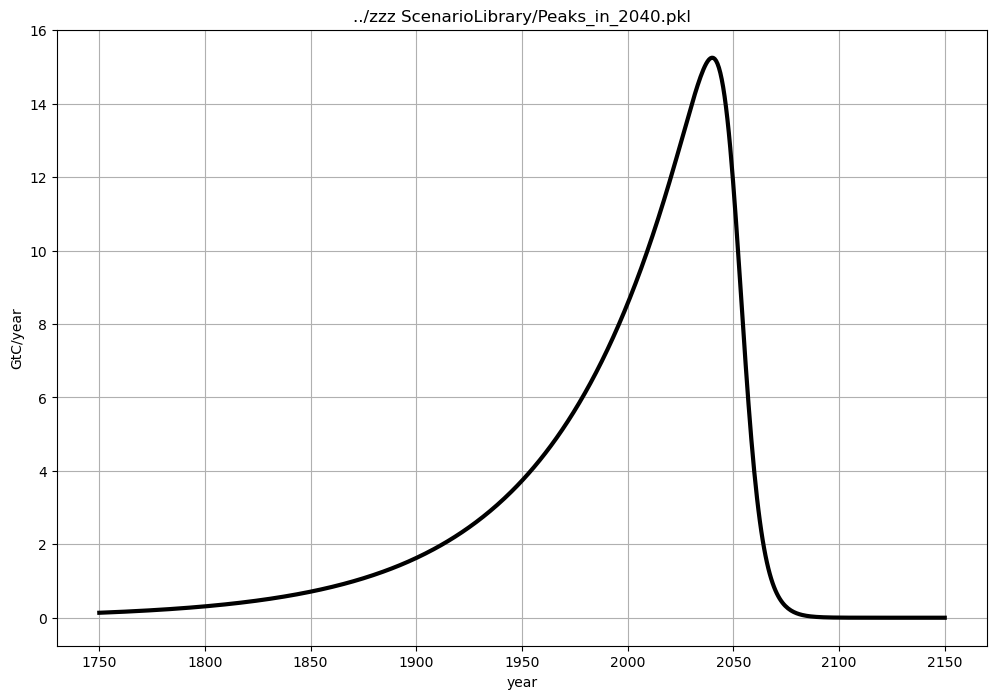

In [18]:
# This shows what I thought I saved
print('What I thought I saved:')
display(epsdictionary)
      
# This loads the stored dictionary and (b/c verbose=True) displays more details about what was loaded
time, eps, epsdictionary_fromfile = cl.LoadMyScenario(filename,verbose=True)

### Validating and finishing up
Assuming all this has gone smoothly, don't forget to do a Kernel/Restart & Run All, run the whole notebook, and make sure there aren't any errors.